In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import os

In [2]:
img_size = (224, 224)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    'dataset/val',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    'dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 1462 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False 

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


Epoch 1/10


c:\College\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 53s 919ms/step - accuracy: 0.9232 - loss: 0.1660 - val_accuracy: 0.9933 - val_loss: 0.0200
Epoch 2/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 587ms/step - accuracy: 0.9879 - loss: 0.0370 - val_accuracy: 0.9967 - val_loss: 0.0195
Epoch 3/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 31s 594ms/step - accuracy: 0.9990 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 4/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 590ms/step - accuracy: 0.9996 - loss: 0.0023 - val_accuracy: 0.9967 - val_loss: 0.0074
Epoch 5/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 31s 598ms/step - accuracy: 0.9970 - loss: 0.0073 - val_accuracy: 1.0000 - val_loss: 0.0032
Epoch 6/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 586ms/step - accuracy: 0.9980 - loss: 0.0033 - val_accuracy: 0.9967 - val_loss: 0.0109
Epoch 7/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 31s 600ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 8/10
46/46 ━━━━━━━━━━━━━━━━━━━━ 30s 598ms/step - accuracy: 0.9999 - loss: 0.0020 - val_accuracy: 0.996

In [ ]:
train_gen.class_indices
train_gen.classes.sum(), len(train_gen.classes) 


(712, 1462)

Label: 1.0


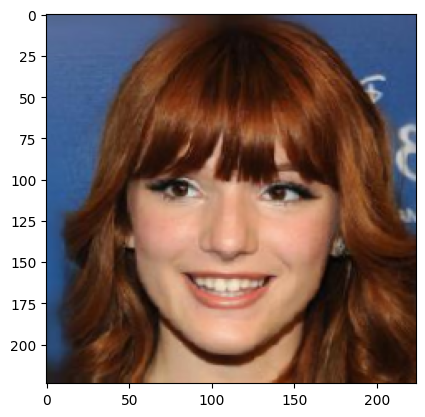

In [6]:
import matplotlib.pyplot as plt
images, labels = next(train_gen)
plt.imshow(images[0])
print("Label:", labels[0])


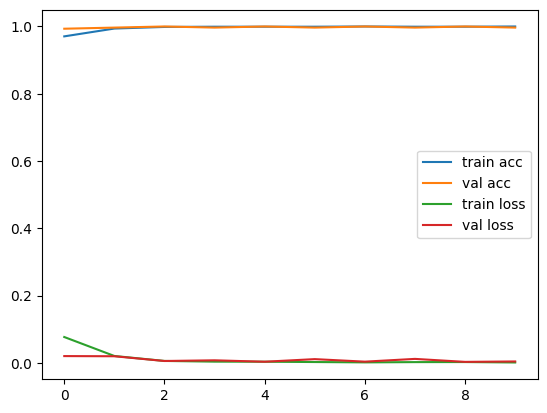

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()


In [8]:
model.save('acne_classifier.keras')


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


Found 300 images belonging to 2 classes.


c:\College\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 400ms/step
              precision    recall  f1-score   support

       Clear       1.00      1.00      1.00       150
        Acne       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



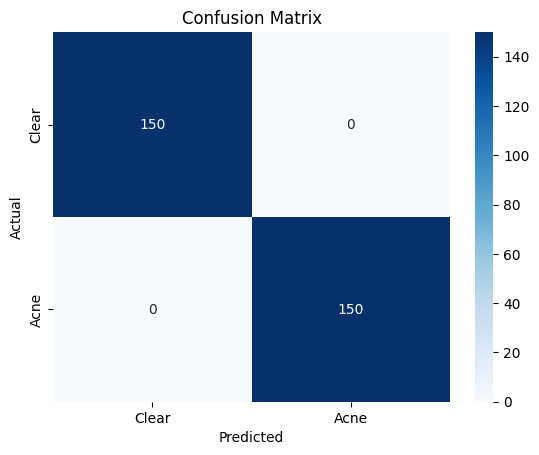

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get predictions
preds = model.predict(test_generator)
pred_labels = (preds > 0.5).astype("int32").flatten()

# True labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, pred_labels, target_names=["Clear", "Acne"]))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Clear", "Acne"], yticklabels=["Clear", "Acne"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("noacneatall.jpg", target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction:", "Acne" if prediction < 0.5 else "Clear")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Prediction: Clear
